In [4]:
import numpy as np
import time
import generalized_genSim_shorten_time_HMM as ggsdHMM
import numpy as np
import curve_fitting as cf
import matplotlib.pyplot as plt
#import matplotlib.colors as colors
#import matplotlib.cm as cmx
from scipy import optimize, stats
import bluepyopt as bpop
import bluepyopt.deapext.algorithms as algo
import vclamp_evaluator_HMM as vcl_ev
import pickle
import time
from deap import tools
#from deap import base, creator
import multiprocessing
#import eval_helper as eh
#import scoring_functions_relative as sf
#import curve_fitting as cf

In [5]:
evaluator = vcl_ev.Vclamp_evaluator_HMM('./csv_files/params_na12mut8st.csv', 'A427D', 'na12mut8st', objective_names=['inact', 'act', 'recov'])


#evaluator = vcl_ev.Vclamp_evaluator_HMM('./param_stats_narrow.csv', 'A427D', 'na', objective_names=['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope'])

In [3]:
evaluator.wild_data

{'v_half_act': -28.83400826795078,
 'gv_slope': 6.954845403989157,
 'v_half_ssi': -62.432501647160564,
 'ssi_slope': 10.72104729646057,
 'tau_fast': 2.589626256935182,
 'tau_slow': 5.179487171177823,
 'percent_fast': 0.001024767883506046}

In [4]:
gen_counter = 0
best_indvs = []
cp_freq = 1
old_update = algo._update_history_and_hof
def my_update(halloffame, history, population):
    global gen_counter,cp_freq
    if halloffame is not None:
        halloffame.update(population)
    
    if halloffame:
        best_indvs.append(halloffame[0])
    gen_counter = gen_counter+1
    print("Current generation: ", gen_counter)
    if gen_counter%cp_freq == 0:
        fn = '.pkl'
        save_logs(fn,best_indvs,population)

def my_record_stats(stats, logbook, gen, population, invalid_count):
    '''Update the statistics with the new population'''
    record = stats.compile(population) if stats is not None else {}
    logbook.record(gen=gen, nevals=invalid_count, **record)
    print('log: \n', logbook, '\n')
    output = open("log.pkl", 'wb')
    pickle.dump(logbook, output)
    output.close()

def save_logs(fn, best_indvs, hof):
    output = open("indv"+fn, 'wb')
    pickle.dump(best_indvs, output)
    output.close()
    output = open("hof"+fn, 'wb')
    pickle.dump(hof, output)


In [5]:
#hof = tools.HallOfFame(1, similar=np.array_equal)
hof = tools.ParetoFront()
algo._update_history_and_hof = my_update
algo._record_stats = my_record_stats
pool = multiprocessing.Pool(processes=64)
deap_opt = bpop.optimisations.DEAPOptimisation(evaluator, offspring_size=10, hof = hof, map_function=pool.map)  # CHANGE offspring_size

cp_file = './cp.pkl'

/global/u1/m/mikelam/SimulatingVariants/generalized_genSim_shorten_time_HMM.py:887: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


[0.004771874601261192, 0.017855008544529438, 0.023894297635480493, 0.02313915830298883, 0.019103663753726366, 0.014349207775052619, 0.010129324463455366, 0.006845940224821309, 0.004481485846916189, 0.002863526811467785, 0.0017956146116012751, 0.0011093143861512114, 0.0006771601598857634, 0.00040934501239853243, 0.0002454711694836355, 0.00014622377448005397, 8.661970209868017e-05, 5.107163884279501e-05, 2.99929238006539e-05, 1.755447614986198e-05, 1.024458585785064e-05, 5.9635765050275165e-06, 3.4638572682867223e-06, 2.0079795255615213e-06, 1.1619369500346274e-06, 6.712451059612352e-07, 3.8714978979417317e-07, 2.229311425011298e-07, 1.2814952753701036e-07, 7.352553482849798e-08, 4.2092480847333e-08, 2.4033781519612383e-08, 1.3677698847821131e-08, 7.751522946949285e-09, 4.369187595268078e-09, 2.4451059848058858e-09, 1.3552488658277928e-09, 7.414190729133382e-10, 3.9834817939500536e-10, 2.0863783390447904e-10, 1.0530977690608398e-10, 5.0271296720573074e-11, 2.1946549034163888e-11, 8.18155

/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/u1/m/mikelam/SimulatingVariants/generalized_genSim_shorten_time_HMM.py:887: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/SimulatingVariants/generalized_genSim_shorten_time_HMM.py:887: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/SimulatingVariants/generalized_genSim_shorten_time_HMM.py:887: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/SimulatingVariants/generalized_genSim_shorten_time_HMM.py:887: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't fit curve to recovery.
Couldn't fit curve to recovery.
[0.006023359641738031, 0.022269812700185406, 0.02933122701304422, 0.027960226434318242, 0.02273869551025985, 0.016837878320567125, 0.011727916441517957, 0.00782754558147445, 0.005064444140777609, 0.0032009843626003556, 0.0019870604314106387, 0.0012161793273064818, 0.0007360275075710418, 0.0004414190902463545, 0.0002627874804682506, 0.00015550079921724933, 9.155754347234558e-05, 5.3685536627199666e-05, 3.137033468474262e-05, 1.827764590783777e-05, 1.062320451088014e-05, 6.1614409411430615e-06, 3.567188302274079e-06, 2.061981295527668e-06, 1.1902314692736363e-06, 6.861448235381e-07, 3.950609794775935e-07, 2.2718427251264248e-07, 1.3047661254457244e-07, 7.48289964909611e-08, 4.284435159195034e-08, 2.4482627260478988e-08, 1.395577577074555e-08, 7.930271250573941e-09, 4.488007206522828e-09, 2.526322455023108e-09, 1.4119382784645693e-09, 7.81533926361449e-10, 4.269203707608069e-10, 2.2897601287572104e-10, 1.1966583577760056e-10,

/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[0.005400172997970654, 0.02007059655824592, 0.026637530877615227, 0.025586573136038782, 0.020960567931667735, 0.015628459869979905, 0.010956120332990881, 0.007356707782134107, 0.004786625730423954, 0.00304119258440456, 0.0018969828432377376, 0.0011662143416047322, 0.0007086755558141048, 0.00042660843525225544, 0.0002548404736434493, 0.00015126918701183383, 8.931880650857675e-05, 5.250754399585685e-05, 3.075327823776621e-05, 1.7955591049971034e-05, 1.045557739625665e-05, 6.074345704022819e-06, 3.5219624592546264e-06, 2.038476306237306e-06, 1.1779809913755464e-06, 6.797255720932183e-07, 3.9166754240075187e-07, 2.2536649562616403e-07, 1.294845288236317e-07, 7.427393900619493e-08, 4.252403589519608e-08, 2.429101259484225e-08, 1.3836653018912995e-08, 7.853361569441439e-09, 4.43663492877097e-09, 2.4910364724915986e-09, 1.3871923942067314e-09, 7.639433866381714e-10, 4.1433372504756935e-10, 2.1997149979952909e-10, 1.1327106444671732e-10, 5.575358319726872e-11, 2.558831420592383e-11, 1.04472509

/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[0.006222606721500262, 0.022981446524745024, 0.030198930256661295, 0.028719559587850118, 0.02330318784136447, 0.017218804999874462, 0.011969075907371406, 0.0079734984836445, 0.005149884439606576, 0.003249742434416254, 0.0020143335074413455, 0.0012311915739386156, 0.0007441833521425007, 0.000445802315744655, 0.00026512201390298083, 0.00015673480542658633, 9.220568253832492e-05, 5.40241484039277e-05, 3.15464608278195e-05, 1.8368935545041285e-05, 1.0670399504948598e-05, 6.185802028686912e-06, 3.5797592219402237e-06, 2.0684766537838634e-06, 1.1935991313660396e-06, 6.87901873145852e-07, 3.959869984680376e-07, 2.2767967744797577e-07, 1.3074724684311544e-07, 7.498095850373648e-08, 4.2932605408522437e-08, 2.4535885800183233e-08, 1.3989230514466918e-08, 7.952107804305858e-09, 4.502746802226348e-09, 2.5365425003170016e-09, 1.4191643084219113e-09, 7.867069180326963e-10, 4.3064541330153227e-10, 2.316575259866906e-10, 1.2158322165309844e-10, 6.157422824959494e-11, 2.9552960612355384e-11, 1.30209772

/global/u1/m/mikelam/SimulatingVariants/generalized_genSim_shorten_time_HMM.py:887: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


[0.005208998374291884, 0.019415714184198202, 0.025834994881857632, 0.024875782457867545, 0.020424626351890206, 0.015261343886346887, 0.010720127790288091, 0.00721167485419137, 0.004700416644749567, 0.002991244092440874, 0.0018686212821904366, 0.0011503694578860165, 0.00069994013434564, 0.00042184517629761036, 0.0002522669320025436, 0.0001498894486638848, 8.858391025361786e-05, 5.211825628905356e-05, 3.054800303223222e-05, 1.7847743644332372e-05, 1.039907266621138e-05, 6.044793015240432e-06, 3.506514802905897e-06, 2.030394087462333e-06, 1.1737401927955086e-06, 6.774882157155662e-07, 3.9047665756048947e-07, 2.2472418789979697e-07, 1.29131624570845e-07, 7.407524283496872e-08, 4.240872167032581e-08, 2.4221707693117945e-08, 1.3793417856521182e-08, 7.825386590498059e-09, 4.417931004940975e-09, 2.478190715697936e-09, 1.3781928129521564e-09, 7.575577488859414e-10, 4.097768956927571e-10, 2.1672390955361635e-10, 1.1097715113420371e-10, 5.4163171783716005e-11, 2.452152135302876e-11, 9.77262408297

/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/u1/m/mikelam/SimulatingVariants/generalized_genSim_shorten_time_HMM.py:887: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/SimulatingVariants/generalized_genSim_shorten_time_HMM.py:887: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/SimulatingVariants/generalized_genSim_shorten_time_HMM.py:887: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/SimulatingVariants/generalized_genSim_shorten_time_HMM.py:887: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/SimulatingVariants/generalized_genSim_shorten_time_HMM.py:887: RuntimeWarning: div

Couldn't fit curve to recovery.
[0.002957233169318783, 0.011260530701116172, 0.015478671623408612, 0.015402132896069376, 0.013056046064668737, 0.010058218823928492, 0.007273829343846029, 0.005030159273842254, 0.0033652076911030097, 0.002194892188888995, 0.001403259133401817, 0.0008828672066100214, 0.0005482334804959348, 0.00033676728302327655, 0.00020500102728190255, 0.00012383802717291523, 7.432157358474857e-05, 4.4354510423073995e-05, 2.6342032778176308e-05, 1.5578202738078975e-05, 9.178281819893086e-06, 5.389634796452096e-06, 3.155385666353316e-06, 1.8422478153007094e-06, 1.0728042773908687e-06, 6.231753196025606e-07, 3.610945232875183e-07, 2.0869586318687954e-07, 1.202817619716354e-07, 6.910768536981561e-08, 3.956035033456222e-08, 2.254555742278227e-08, 1.2777472707587843e-08, 7.190022055023678e-09, 4.008261413662734e-09, 2.2067752970667157e-09, 1.1944517703602655e-09, 6.313625934105934e-10, 3.2257591190972027e-10, 1.5668706036441875e-10, 7.029716968012639e-11, 2.7523264119263185e-

/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[0.002957233169318783, 0.011260530701116172, 0.015478671623408612, 0.015402132896069376, 0.013056046064668737, 0.010058218823928492, 0.007273829343846029, 0.005030159273842254, 0.0033652076911030097, 0.002194892188888995, 0.001403259133401817, 0.0008828672066100214, 0.0005482334804959348, 0.00033676728302327655, 0.00020500102728190255, 0.00012383802717291523, 7.432157358474857e-05, 4.4354510423073995e-05, 2.6342032778176308e-05, 1.5578202738078975e-05, 9.178281819893086e-06, 5.389634796452096e-06, 3.155385666353316e-06, 1.8422478153007094e-06, 1.0728042773908687e-06, 6.231753196025606e-07, 3.610945232875183e-07, 2.0869586318687954e-07, 1.202817619716354e-07, 6.910768536981561e-08, 3.956035033456222e-08, 2.254555742278227e-08, 1.2777472707587843e-08, 7.190022055023678e-09, 4.008261413662734e-09, 2.2067752970667157e-09, 1.1944517703602655e-09, 6.313625934105934e-10, 3.2257591190972027e-10, 1.5668706036441875e-10, 7.029716968012639e-11, 2.7523264119263185e-11, 8.202092524347555e-12, 1.114

/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[0.0042377899624125815, 0.01601756074415287, 0.021608413398876685, 0.021080716866043084, 0.017525039765261825, 0.013249339197116513, 0.009410260873483964, 0.006396577751358977, 0.004209928399461726, 0.002703600056917132, 0.0017033302042716479, 0.0010569307156567793, 0.000647823575564423, 0.0003930984991204501, 0.0002365580422047652, 0.0001413725482886237, 8.399700422443612e-05, 4.966180597899704e-05, 2.923868916727259e-05, 1.7152560576902675e-05, 1.0031075031416165e-05, 5.850400904570097e-06, 3.4039359988386715e-06, 1.976251074260623e-06, 1.1451083195546912e-06, 6.622856222502073e-07, 3.823487817117177e-07, 2.2033266376249891e-07, 1.2672282047331775e-07, 7.272682234469043e-08, 4.163408969726709e-08, 2.3762747232596013e-08, 1.3512021101049837e-08, 7.64670982591396e-09, 4.300686685736221e-09, 2.3990600066019776e-09, 1.3236126396166352e-09, 7.193636172114394e-10, 3.8286711147410925e-10, 1.9778859681102682e-10, 9.779244920147884e-11, 4.518884279237779e-11, 1.8664079315151438e-11, 6.2407407

/global/u1/m/mikelam/SimulatingVariants/generalized_genSim_shorten_time_HMM.py:887: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/SimulatingVariants/generalized_genSim_shorten_time_HMM.py:887: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/SimulatingVariants/generalized_genSim_shorten_time_HMM.py:887: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/SimulatingVariants/generalized_genSim_shorten_time_HMM.py:887: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/SimulatingVariants/generalized_genSim_shorten_time_HMM.py:887: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/SimulatingVariants/generalized_genSim_shorten_time_HMM.py:887: RuntimeWarning: divide by zero encountered in log
  tau = -h.ts

[0.002913821037745615, 0.0110988783619131, 0.01526718804645757, 0.015202882235757999, 0.01289651430206097, 0.009942327875497932, 0.007194907955530233, 0.004978826731647749, 0.003332943776764063, 0.002175142816407479, 0.0013914212489238025, 0.0008758911949864516, 0.0005441797877447388, 0.00033443915549622995, 0.00020367709273833048, 0.00012309145871084847, 7.39036036697691e-05, 4.412194693216368e-05, 2.62133109015159e-05, 1.550727177819904e-05, 9.139338306759358e-06, 5.368314234361942e-06, 3.143736279059541e-06, 1.835888933980503e-06, 1.0693324936958919e-06, 6.212765661569837e-07, 3.6005232151562665e-07, 2.0812036407208516e-07, 1.199611040211236e-07, 6.892676312942103e-08, 3.945656567118427e-08, 2.2484780548212143e-08, 1.2741009673064716e-08, 7.167559296071311e-09, 3.99404850627053e-09, 2.1975589631930168e-09, 1.188355893409728e-09, 6.272790785152837e-10, 3.198315772203017e-10, 1.548599670875223e-10, 6.911414979580033e-11, 2.680182654566915e-11, 7.816797845995434e-12, 9.765044818185123e

/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[0.004963364235656881, 0.01860640404226655, 0.02484865961548058, 0.024002181303196677, 0.019764660622110002, 0.014808021228277925, 0.010427785722238885, 0.0070313928521309466, 0.00459287168283482, 0.002928706228380501, 0.0018329802150424354, 0.0011303839390100277, 0.0006888811583078582, 0.00041579269117804005, 0.00024898485352390135, 0.00014812345689131775, 8.7639906078159e-05, 5.161643291082219e-05, 3.028247044287054e-05, 1.770776883663276e-05, 1.032549856560699e-05, 6.006196015700387e-06, 3.4862838966374406e-06, 2.0197843160352022e-06, 1.1681632463776968e-06, 6.745430868557221e-07, 3.8890928683682907e-07, 2.2388020953206878e-07, 1.2866953865202046e-07, 7.38165381581291e-08, 4.225975065482809e-08, 2.413303607509719e-08, 1.3738695735143445e-08, 7.790367667762353e-09, 4.3947597989815655e-09, 2.462422501067169e-09, 1.367231495599387e-09, 7.498305720138441e-10, 4.042932694050571e-10, 2.1283560308605172e-10, 1.0824496343304825e-10, 5.228063425832788e-11, 2.3269704520215465e-11, 8.992320795

/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[0.0088461202869455, 0.03163887699242674, 0.04036271713699197, 0.037343469571525185, 0.029536903041512096, 0.021315798185655946, 0.014498227677144317, 0.009467456619819565, 0.006004146078490592, 0.003726264996336664, 0.0022750423653601242, 0.0013716357345895669, 0.0008188960642890527, 0.0004851392615801595, 0.0002856566377048759, 0.0001673779429212886, 9.768923709684679e-05, 5.683545068423427e-05, 3.2981983547119415e-05, 1.9099679671504988e-05, 1.1041588008029705e-05, 6.374161266046395e-06, 3.6753807250878478e-06, 2.1171297548403793e-06, 1.2184735358651235e-06, 7.007246910973416e-07, 4.0268291383964654e-07, 2.3124251628845113e-07, 1.3269249977893551e-07, 7.60787796364097e-08, 4.357708171371613e-08, 2.4930892457356425e-08, 1.424197566724855e-08, 8.12027819060349e-09, 4.618343244632226e-09, 2.6179988916770356e-09, 1.4775662815440142e-09, 8.290276921986798e-10, 4.6146370144816683e-10, 2.540948529260792e-10, 1.378335183559444e-10, 7.321569979029346e-11, 3.7740194739801213e-11, 1.8608691798

/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/u1/m/mikelam/SimulatingVariants/generalized_genSim_shorten_time_HMM.py:887: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/SimulatingVariants/generalized_genSim_shorten_time_HMM.py:887: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/SimulatingVariants/generalized_genSim_shorten_time_HMM.py:887: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/SimulatingVariants/generalized_genSim_shor

[0.0042377899624125815, 0.01601756074415287, 0.021608413398876685, 0.021080716866043084, 0.017525039765261825, 0.013249339197116513, 0.009410260873483964, 0.006396577751358977, 0.004209928399461726, 0.002703600056917132, 0.0017033302042716479, 0.0010569307156567793, 0.000647823575564423, 0.0003930984991204501, 0.0002365580422047652, 0.0001413725482886237, 8.399700422443612e-05, 4.966180597899704e-05, 2.923868916727259e-05, 1.7152560576902675e-05, 1.0031075031416165e-05, 5.850400904570097e-06, 3.4039359988386715e-06, 1.976251074260623e-06, 1.1451083195546912e-06, 6.622856222502073e-07, 3.823487817117177e-07, 2.2033266376249891e-07, 1.2672282047331775e-07, 7.272682234469043e-08, 4.163408969726709e-08, 2.3762747232596013e-08, 1.3512021101049837e-08, 7.64670982591396e-09, 4.300686685736221e-09, 2.3990600066019776e-09, 1.3236126396166352e-09, 7.193636172114394e-10, 3.8286711147410925e-10, 1.9778859681102682e-10, 9.779244920147884e-11, 4.518884279237779e-11, 1.8664079315151438e-11, 6.2407407

/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[0.0024949281706547867, 0.00953895563313064, 0.013215122302217263, 0.013257285192961666, 0.011328549841462265, 0.00879575245215986, 0.006408924899645165, 0.004464231842846919, 0.0030073872056842247, 0.001974567060868533, 0.00127041938654442, 0.0008041292751286582, 0.0005022152761870286, 0.0003101865703211519, 0.0001897995310911087, 0.00011521760812445164, 6.946844795563734e-05, 4.163923231566756e-05, 2.4830912429129093e-05, 1.474099662574613e-05, 8.71616213587455e-06, 5.135298348740135e-06, 3.015696342287926e-06, 1.765610961410909e-06, 1.0307574390709649e-06, 6.000721953391584e-07, 3.48358576297844e-07, 2.0163594554682446e-07, 1.1633541009328634e-07, 6.687577076375996e-08, 3.827835464869649e-08, 2.179478504960316e-08, 1.232765868731638e-08, 6.9136826747077026e-09, 3.834121448711878e-09, 2.0944393478640582e-09, 1.1206104543069783e-09, 5.822585936990159e-10, 2.8986864815107487e-10, 1.3516558210832722e-10, 5.66013967895242e-11, 1.9418292508480607e-11, 4.1582936889172505e-12, 5.81498183231

/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[0.004572827152897201, 0.017218403609560822, 0.023118339874135214, 0.022448277621625153, 0.01857809942964956, 0.013985430095522998, 0.009892850013076295, 0.006698922347782863, 0.004393065628137796, 0.0028116893458497434, 0.0017658313409533311, 0.0010924786649976377, 0.0006677695317787997, 0.0004041648553421477, 0.00024264008975184451, 0.00014468863000630447, 8.579279918578542e-05, 5.062873167130301e-05, 2.975681104846555e-05, 1.7429091305056508e-05, 1.0178202532482867e-05, 5.92850474225337e-06, 3.4453476470265723e-06, 1.998208539638861e-06, 1.1567692643916623e-06, 6.685009564226124e-07, 3.856825423829376e-07, 2.2213833247085562e-07, 1.2771464372214448e-07, 7.328208776680684e-08, 4.195262798987348e-08, 2.395092286162606e-08, 1.3626899283335488e-08, 7.71926913640249e-09, 4.3480248241683e-09, 2.4308239466095845e-09, 1.3453987719063767e-09, 7.345269065888232e-10, 3.9349293075097885e-10, 2.0522200203488983e-10, 1.0293192773306984e-10, 4.8653408603676525e-11, 2.0891246703127393e-11, 7.546008

/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/u1/m/mikelam/SimulatingVariants/generalized_genSim_shorten_time_HMM.py:887: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/SimulatingVariants/generalized_genSim_shorten_time_HMM.py:887: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/SimulatingVariants/generalized_genSim_shorten_time_HMM.py:887: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/SimulatingVariants/generalized_genSim_shorten_time_HMM.py:887: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/SimulatingVariants/generalized_genSim_shorten_time_HMM.py:887: RuntimeWarning: divi

[0.008456459680349387, 0.030388455033764004, 0.0389267729243889, 0.03615029627288069, 0.028691801799430896, 0.02077134471403587, 0.014168660011375789, 0.00927651275284802, 0.00589702689754097, 0.0036676281970233833, 0.0022435543843274575, 0.0013549833318869313, 0.0008101979856393902, 0.0004806420340760462, 0.00028335099035787695, 0.00016620421178741677, 9.709526526837044e-05, 5.653635928222413e-05, 3.28319956872236e-05, 1.9024711520058945e-05, 1.1004208655002195e-05, 6.355551732918196e-06, 3.6661188150371777e-06, 2.1125143934605955e-06, 1.2161657926995157e-06, 6.995633539977614e-07, 4.0209224844258337e-07, 2.3093717334880064e-07, 1.3253091714888023e-07, 7.599053162013471e-08, 4.352694244532284e-08, 2.4901081563718706e-08, 1.4223390326906455e-08, 8.108160046267898e-09, 4.610132153990341e-09, 2.612265062937954e-09, 1.4734748510484973e-09, 8.260669705332022e-10, 4.593047031570977e-10, 2.5251678524250823e-10, 1.3668287502960844e-10, 7.238283134090482e-11, 3.7145230587385743e-11, 1.81926561

/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[0.010238300880470655, 0.03600679235891859, 0.04529698300734367, 0.041382005565151425, 0.03235634448314998, 0.02310709223318336, 0.01556798364831812, 0.01007916093673904, 0.006342948286382895, 0.003909424238819801, 0.0023722075334642063, 0.001422413166867087, 0.0008451117781308216, 0.0004985404477292554, 0.0002924513441415592, 0.00017079975823466198, 9.9402867310299e-05, 5.768975272137097e-05, 3.340638709845474e-05, 1.9309999906161004e-05, 1.1145688315745042e-05, 6.42570402143923e-06, 3.7009628759163447e-06, 2.1298948369048815e-06, 1.2249032223678939e-06, 7.040119834469341e-07, 4.044011272279982e-07, 2.321684534180453e-07, 1.332114384666768e-07, 7.638336195076328e-08, 4.376489535572121e-08, 2.505235432873213e-08, 1.432386758325016e-08, 8.177359395423578e-09, 4.659119798494886e-09, 2.6476226565050786e-09, 1.499317043230594e-09, 8.45090092709613e-10, 4.733485421474192e-10, 2.6287748102635497e-10, 1.4429546738352667e-10, 7.793323442862969e-11, 4.11423702112323e-11, 2.1017007608407745e-11,

/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Couldn't fit curve to recovery.
[0.003950170515337, 0.014969571888770582, 0.020277941235034593, 0.01986544698937937, 0.016581739312698802, 0.012584864889845431, 0.008971340279028689, 0.006119564486635599, 0.004040922249396158, 0.0026031431828174474, 0.0016448371890613585, 0.001023434086392379, 0.0006289016180006013, 0.0003825303948246674, 0.00023071172826967572, 0.00013816437588428667, 8.224856407505438e-05, 4.8714456057887365e-05, 2.8727909585937912e-05, 1.687828464734101e-05, 9.884272321482825e-06, 5.772012395863858e-06, 3.3621365267820157e-06, 1.9539665866735136e-06, 1.1332125435676818e-06, 6.559151248972045e-07, 3.789177350611725e-07, 2.1846824186355646e-07, 1.2569655453885117e-07, 7.215188696810391e-08, 4.1304603936026074e-08, 2.356865229443474e-08, 1.3394059696008437e-08, 7.57263260602336e-09, 4.252674155464785e-09, 2.3670631104679583e-09, 1.3018154982517002e-09, 7.042942058622484e-10, 3.7237944127663095e-10, 1.9050750307011098e-10, 9.280544935002608e-11, 4.187118522855877e-11, 1

/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Couldn't fit curve to recovery.


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/u1/m/mikelam/SimulatingVariants/generalized_genSim_shorten_time_HMM.py:887: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/SimulatingVariants/generalized_genSim_shorten_time_HMM.py:887: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/SimulatingVariants/generalized_genSim_shorten_time_HMM.py:887: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


[0.004745294252879142, 0.01782992427828556, 0.023881812099128735, 0.023135316069626547, 0.019103883643886127, 0.014350758731470997, 0.010130965030386227, 0.006847248792837335, 0.0044824054212133525, 0.002864127096447067, 0.001795987832694671, 0.001109538511750851, 0.0006772912939358558, 0.0004094202038592003, 0.0002455135959129405, 0.00014624740287394255, 8.663272072795305e-05, 5.107874806571515e-05, 2.999677728443022e-05, 1.7556552083578522e-05, 1.024569861597789e-05, 5.964170653217366e-06, 3.464173635902761e-06, 2.008147733877778e-06, 1.162026388373052e-06, 6.71292754584366e-07, 3.871752869766486e-07, 2.2294488985842695e-07, 1.2815702576548592e-07, 7.352969195446246e-08, 4.2094836190820874e-08, 2.4035152607809335e-08, 1.3678522490545469e-08, 7.752034773151716e-09, 4.369516501757303e-09, 2.445323857253251e-09, 1.3553968159309257e-09, 7.415213474033459e-10, 3.9841958995618625e-10, 2.0868777189023917e-10, 1.0534441836804676e-10, 5.029484043278616e-11, 2.19619312125886e-11, 8.19087873546

/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[0.00727902442316486, 0.02652309246232782, 0.03441747841133854, 0.03234909036459576, 0.025962228109889515, 0.01898926306440242, 0.01307585307287878, 0.00863528954505963, 0.0055328078905036646, 0.003465811889078807, 0.0021338735548409645, 0.001296290875412155, 0.0007791825050546525, 0.0004644204934115608, 0.0002749392019796117, 0.00016187323842526837, 9.48786040695121e-05, 5.54073994208161e-05, 3.225928293225591e-05, 1.8735053186650335e-05, 1.0857999853724913e-05, 6.281807040563724e-06, 3.6288936393029e-06, 2.0936691365523504e-06, 1.2065701250444285e-06, 6.946297638509326e-07, 3.995174938325344e-07, 2.2956423589805438e-07, 1.3177722833934393e-07, 7.556136009675915e-08, 4.327195240192515e-08, 2.4742598417709305e-08, 1.4120514907942374e-08, 8.038783751472674e-09, 4.5618883200046994e-09, 2.5779451589003396e-09, 1.448680951699898e-09, 8.079896400162028e-10, 4.46071777363358e-10, 2.4283538419252234e-10, 1.2963481474513342e-10, 6.730236701394513e-11, 3.354249881168912e-11, 1.5703544480515075e

/global/u1/m/mikelam/SimulatingVariants/generalized_genSim_shorten_time_HMM.py:887: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/SimulatingVariants/generalized_genSim_shorten_time_HMM.py:887: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/SimulatingVariants/generalized_genSim_shorten_time_HMM.py:887: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/SimulatingVariants/generalized_genSim_shorten_time_HMM.py:887: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/SimulatingVariants/generalized_genSim_shorten_time_HMM.py:887: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/SimulatingVariants/generalized_genSim_shorten_time_HMM.py:887: RuntimeWarning: divide by zero encountered in log
  tau = -h.ts

Couldn't fit curve to recovery.


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[0.0025404303439276613, 0.009667112805184529, 0.013372588650758261, 0.013402418758449396, 0.011443909709967559, 0.008879522790282167, 0.006466164149471358, 0.00450167029414018, 0.003031083496056483, 0.001989187451126501, 0.0012792582509056204, 0.000809385037666809, 0.0005052978773712151, 0.0003119738917905865, 0.0001908257834809545, 0.00011580198091577189, 6.979883472163507e-05, 4.1824879365494035e-05, 2.4934681604497018e-05, 1.4798741249853269e-05, 8.748176858309795e-06, 5.152996094289377e-06, 3.025459156414848e-06, 1.7709902904899738e-06, 1.0337213288788916e-06, 6.017074078448306e-07, 3.492635036857717e-07, 2.0213935476304722e-07, 1.1661767593473227e-07, 6.703580443607495e-08, 3.837042956624576e-08, 2.18487429213034e-08, 1.2359971903987684e-08, 6.933501096739378e-09, 3.846574795643388e-09, 2.102440838479095e-09, 1.1258430534862276e-09, 5.857157393053056e-10, 2.921520778975261e-10, 1.366505392051293e-10, 5.752921165524697e-11, 1.994899899151531e-11, 4.401086812941313e-12, 8.9425728687

/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[0.0012115345881413037, 0.0048027733618452, 0.006859721834562739, 0.007082925375708462, 0.006222400463033125, 0.004961929214162675, 0.0037098199081518177, 0.0026492070077645327, 0.0018280236016257733, 0.0012283374440706769, 0.000808134651203294, 0.0005226342882448282, 0.00033323386014196704, 0.00020995612233029072, 0.0001309525447169442, 8.09703476344892e-05, 4.968975841408529e-05, 3.0293349481227746e-05, 1.836140174538741e-05, 1.1071920193278014e-05, 6.645551289120072e-06, 3.9721122954207855e-06, 2.3651022769624804e-06, 1.4032616124813198e-06, 8.298091430755616e-07, 4.891327877853818e-07, 2.874138118084235e-07, 1.6834671908847487e-07, 9.82776842026686e-08, 5.7165996816163085e-08, 3.311762677756474e-08, 1.9095421628584727e-08, 1.094787596485883e-08, 6.232584551318742e-09, 3.516473338251804e-09, 1.9609264350720136e-09, 1.0765370921957554e-09, 5.785222967303536e-10, 3.016994657595251e-10, 1.5060989227385882e-10, 7.032943472110685e-11, 2.9426681612388386e-11, 1.0037803026312916e-11, 2.101

/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[0.00353124687871772, 0.013434677725538626, 0.018312842166478837, 0.01805470243865512, 0.015163810067376353, 0.011577284135061889, 0.008299991837874993, 0.005692217894068103, 0.003777983474756705, 0.002445542462662733, 0.0015523113531910326, 0.0009700151452703604, 0.0005984821913381119, 0.0003654054348980981, 0.00022116356287374216, 0.00013288406401034932, 7.934871081083334e-05, 4.7131320053479894e-05, 2.7867942583762594e-05, 1.6413093731537404e-05, 9.633475667497762e-06, 5.637140105363415e-06, 3.2897187212345613e-06, 1.9151000122463758e-06, 1.1123330743421152e-06, 6.446678583560055e-07, 3.728285917246017e-07, 2.1514528225287362e-07, 1.2386193045753531e-07, 7.11226538437901e-08, 4.0715078136260644e-08, 2.3222282989830776e-08, 1.318453269443665e-08, 7.44188820066975e-09, 4.168568152955453e-09, 2.3114663247320714e-09, 1.2642567810257543e-09, 6.785483526546759e-10, 3.546218683366479e-10, 1.7830511978708433e-10, 8.455619023705266e-11, 3.648624873874351e-11, 1.3295514435915306e-11, 3.347844

/global/u1/m/mikelam/SimulatingVariants/generalized_genSim_shorten_time_HMM.py:887: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/SimulatingVariants/generalized_genSim_shorten_time_HMM.py:887: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


[0.003902331279278428, 0.014794436125593348, 0.020054618417034754, 0.019660584112824536, 0.016422052522861056, 0.012471912838219605, 0.008896425222392985, 0.00607209414782615, 0.00401184621005246, 0.002585793295965333, 0.0016346962209910455, 0.001017604872409855, 0.0006255965196388974, 0.00038067770955856636, 0.0002296831188347683, 0.00013759791735120798, 8.193876370577359e-05, 4.854601766234791e-05, 2.863678364536226e-05, 1.682918809611457e-05, 9.857907403076046e-06, 5.757888863365194e-06, 3.3545817451820505e-06, 1.9499267567587037e-06, 1.1310498620479839e-06, 6.547539050417597e-07, 3.78290873882748e-07, 2.1812696875120413e-07, 1.2550846028400193e-07, 7.204645635518262e-08, 4.1244204965559837e-08, 2.35331191019867e-08, 1.3372512647822587e-08, 7.559141885480102e-09, 4.243960630172754e-09, 2.361277696145274e-09, 1.2978891632659195e-09, 7.015900428623631e-10, 3.7050491466776817e-10, 1.892119256271991e-10, 9.19230701362624e-11, 4.128890249686502e-11, 1.621510088675286e-11, 4.8706076020728

In [6]:
start_time = time.time()
pop, hof, log, hst = deap_opt.run(max_ngen=10, cp_filename=cp_file)  # CHANGE max_ngen
end_time = time.time()
print(end_time - start_time)

Current generation:  1
log: 
 gen	nevals	avg    	std  	min     	max   
1  	10    	400.837	489.4	0.495784	1000.3 

Current generation:  2
log: 
 gen	nevals	avg    	std    	min     	max   
1  	10    	400.837	489.4  	0.495784	1000.3
2  	10    	450.89 	496.888	0.495784	1000.3 

Current generation:  3
log: 
 gen	nevals	avg    	std    	min     	max    
1  	10    	400.837	489.4  	0.495784	1000.3 
2  	10    	450.89 	496.888	0.495784	1000.3 
3  	10    	100.794	299.819	0.479045	1000.28 

Current generation:  4
log: 
 gen	nevals	avg    	std    	min     	max    
1  	10    	400.837	489.4  	0.495784	1000.3 
2  	10    	450.89 	496.888	0.495784	1000.3 
3  	10    	100.794	299.819	0.479045	1000.28
4  	10    	600.429	489.796	0.479045	1000.91 

Current generation:  5
log: 
 gen	nevals	avg    	std    	min     	max    
1  	10    	400.837	489.4  	0.495784	1000.3 
2  	10    	450.89 	496.888	0.495784	1000.3 
3  	10    	100.794	299.819	0.479045	1000.28
4  	10    	600.429	489.796	0.479045	1000.91
5  	10    	400.

In [28]:
print(log)

gen	nevals	avg      	std        	min      	max      
1  	10    	0.0491723	0          	0.0491723	0.0491723
2  	10    	0.0491723	6.93889e-18	0.0491723	0.0491723
3  	10    	0.0491723	6.93889e-18	0.0491723	0.0491723
4  	10    	0.0491723	6.93889e-18	0.0491723	0.0491723
5  	10    	0.0491723	6.93889e-18	0.0491723	0.0491723
6  	10    	0.0491723	6.93889e-18	0.0491723	0.0491723
7  	10    	0.0491723	6.93889e-18	0.0491723	0.0491723
8  	10    	0.0491723	6.93889e-18	0.0491723	0.0491723
9  	10    	0.0491723	6.93889e-18	0.0491723	0.0491723
10 	10    	0.0491723	6.93889e-18	0.0491723	0.0491723


In [8]:
print(best_indvs[-1])

[251.13271452152281, 0.10437122947276659, 0.12142361782233926, 0.7963678123046358, 87.7432499817526, 0.2181806981554227, 0.9354158757810526, 0.13560383511717164, 495.71666612993937, 0.015815418422276677, 6.354865560447292, 0.0038834888710251834, 12.863770137241847, 2.806668955412046, 0.6863666713200415, 3.9607925155942967, 1519.7510537871524, 0.15726941262882127, 9.740061519725462, 2.449259386085319]


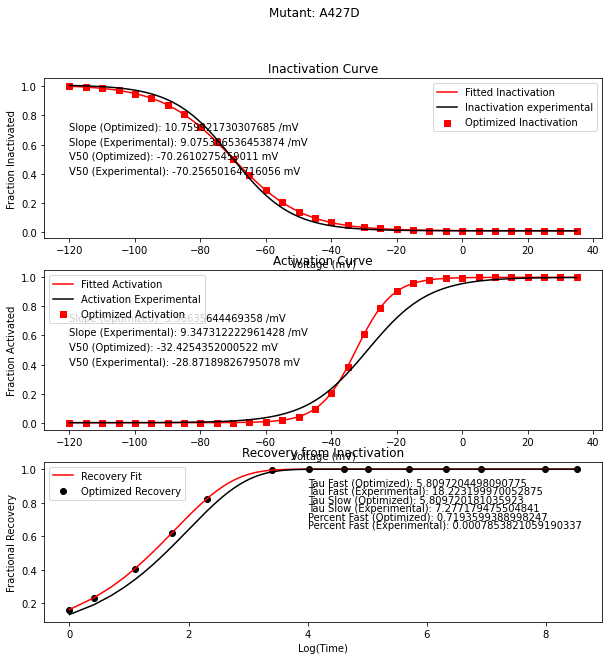

In [3]:
evaluator.plot_data([251.13271452152281, 0.10437122947276659, 0.12142361782233926, 0.7963678123046358, 87.7432499817526, 0.2181806981554227, 0.9354158757810526, 0.13560383511717164, 495.71666612993937, 0.015815418422276677, 6.354865560447292, 0.0038834888710251834, 12.863770137241847, 2.806668955412046, 0.6863666713200415, 3.9607925155942967, 1519.7510537871524, 0.15726941262882127, 9.740061519725462, 2.449259386085319], 'A427D')#'K1260E')

In [30]:
 y0, plateau, percent_fast, k_fast, k_slow = cf.calc_recov_obj('A427D', is_HMM=True)

Couldn't generate recovery data


In [31]:
best_indvs

[[59.960808454275806,
  4.011852919500053,
  2.992222373247351,
  2.0204895911080367,
  -0.7945091439285323,
  0.00016575188193006552,
  2.8816473441237456,
  -0.4193865311667304,
  3.670003151916486,
  4.8836825708437575,
  5.571556992323238,
  2.202226014606267,
  0.9145953262003346,
  11.173810749858964,
  9.361547321148485,
  8.160212467160076,
  -49.016427975234784,
  -47.57514301749477,
  -44.250580212776285,
  -33.22218809303136,
  0.5848793914043773,
  -56.56821380984499,
  -59.05252906422991,
  15.938253344941705],
 [59.960808454275806,
  4.011852919500053,
  0.4757360786690856,
  2.131031579537972,
  -1.9327346778888221,
  0.00019325684978593836,
  1.0585651121891901,
  -1.1980761741817152,
  4.228908271730789,
  4.936109615950887,
  6.732228731380368,
  0.7782445634965374,
  0.899243116497541,
  11.173810749858964,
  14.54010034366299,
  8.160212467160076,
  -48.92390866052809,
  -42.444116265224274,
  -44.622635549422455,
  -32.384272558941106,
  -1.7142864591939393,
  -56.

Generation: 1


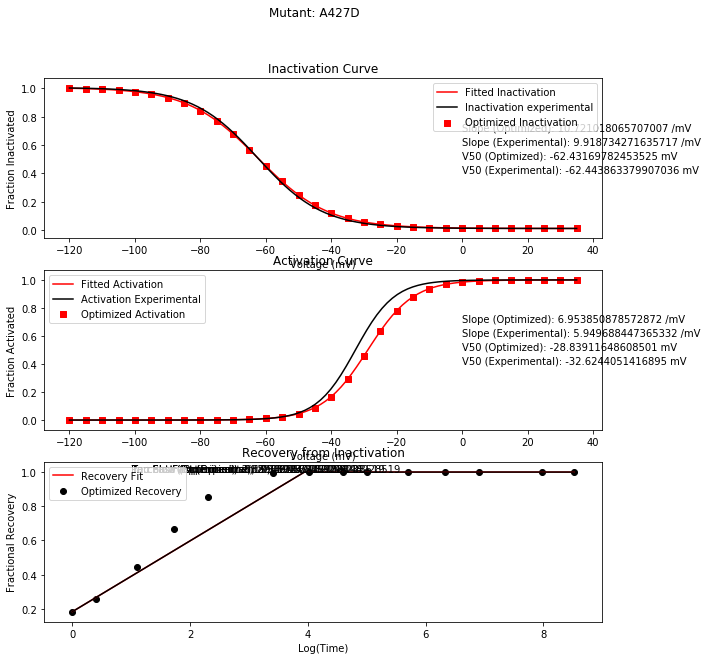

Generation: 2


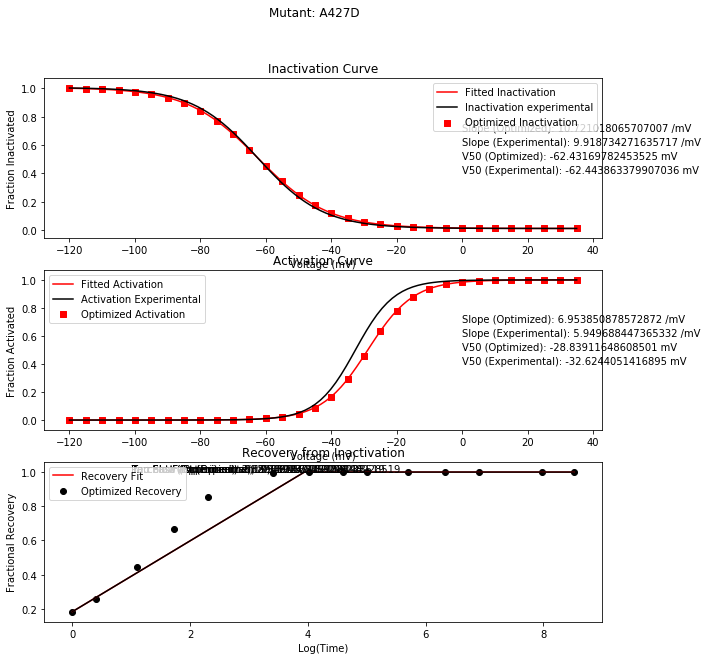

Generation: 3


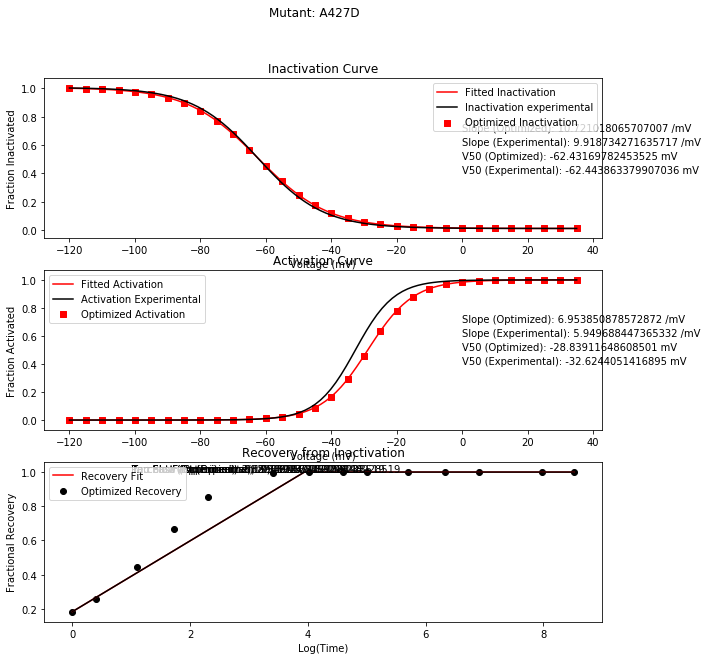

Generation: 4


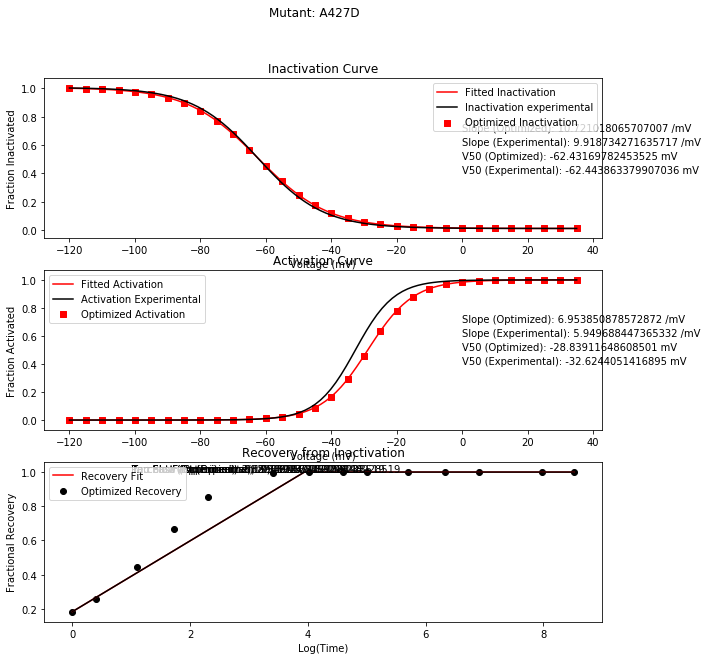

Generation: 5


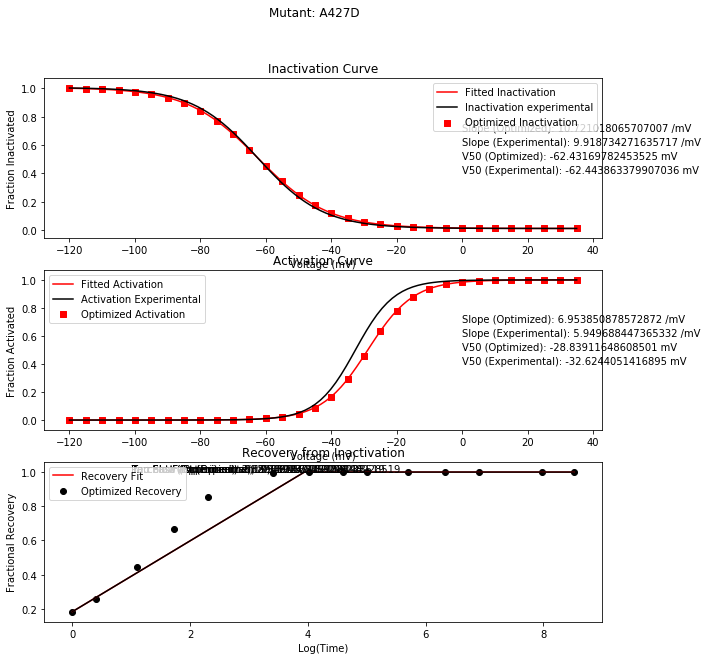

Generation: 6


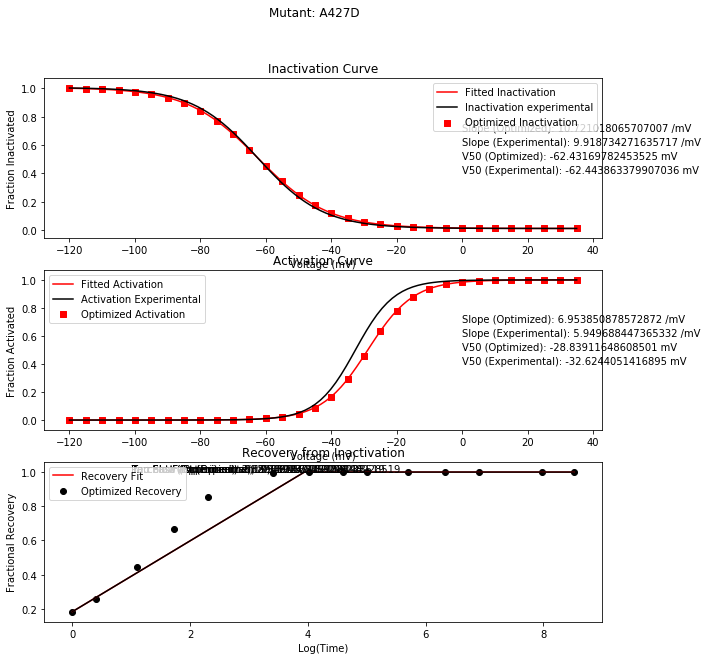

Generation: 7


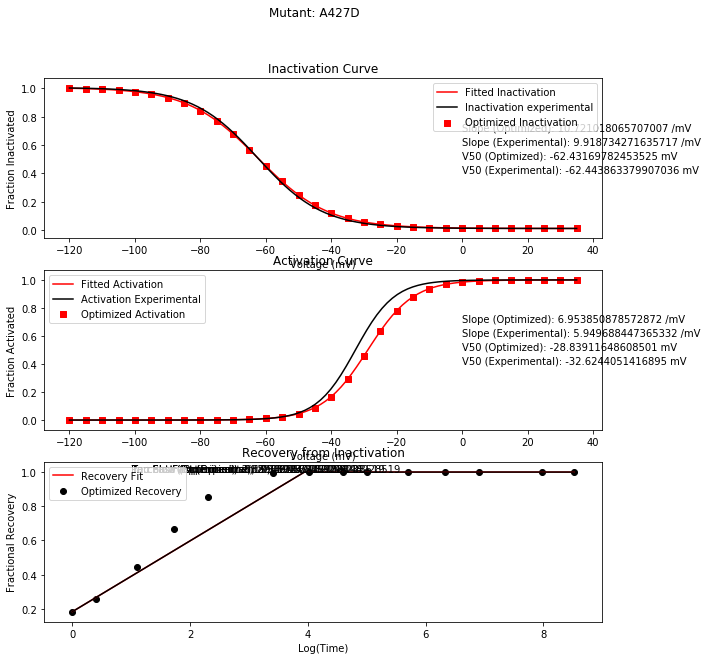

Generation: 8


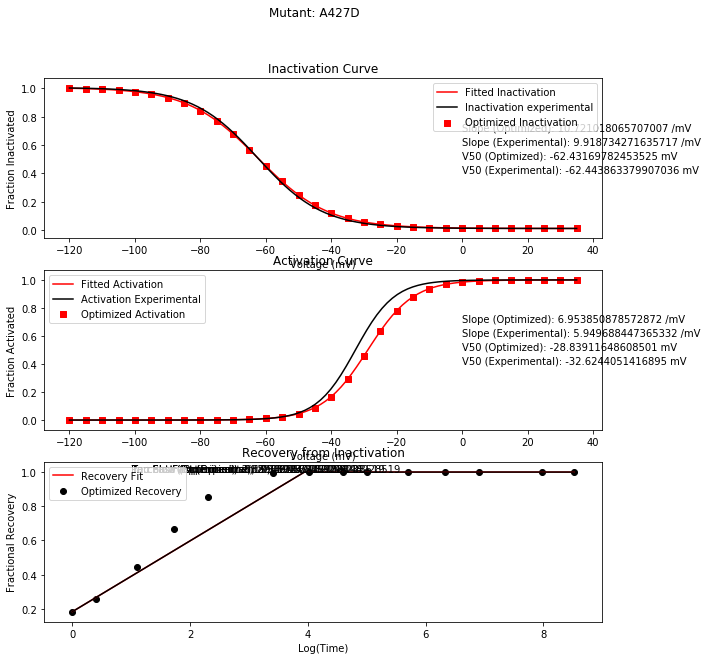

Generation: 9


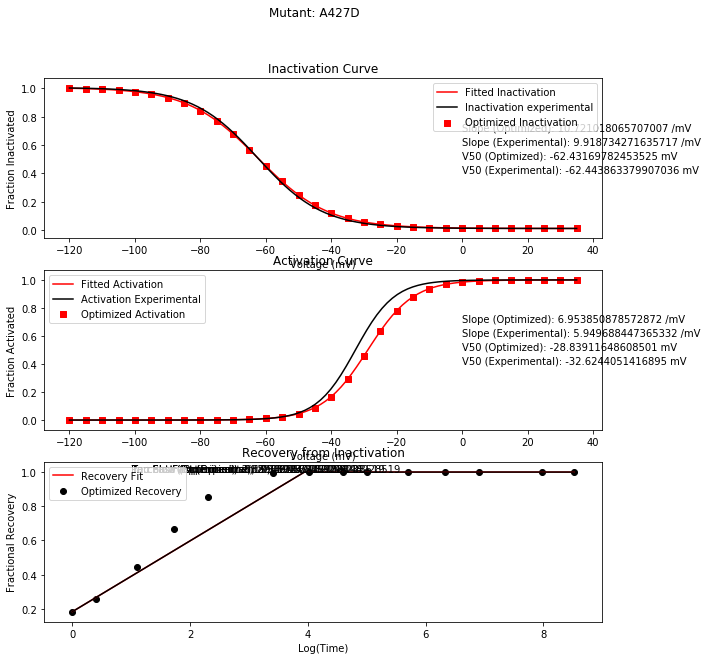

Generation: 10


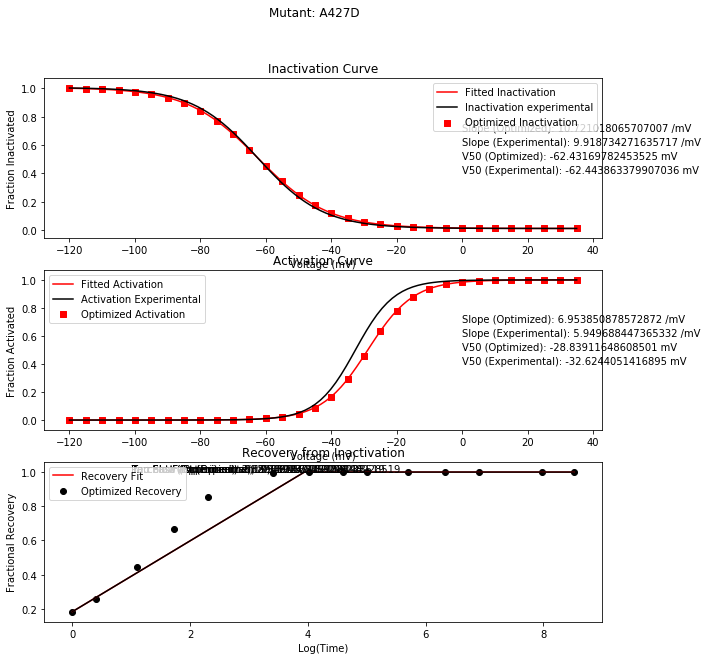

Generation: 11


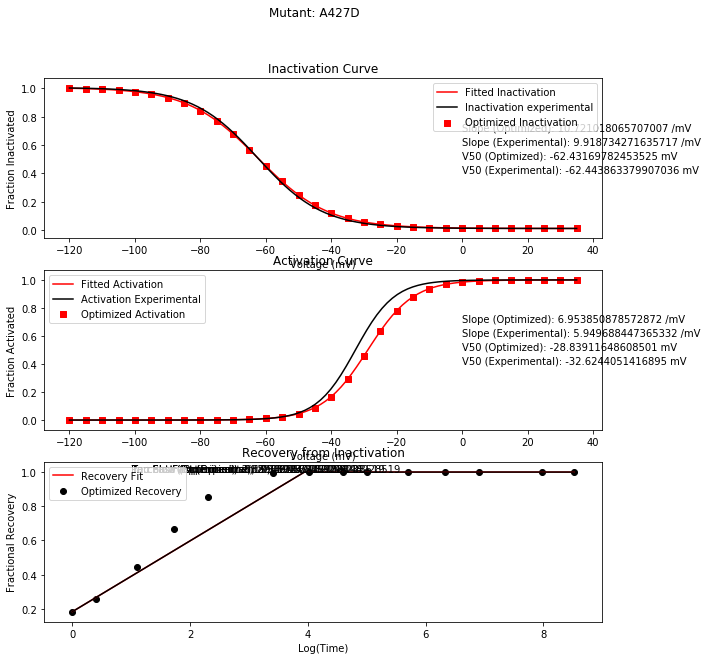

Generation: 12


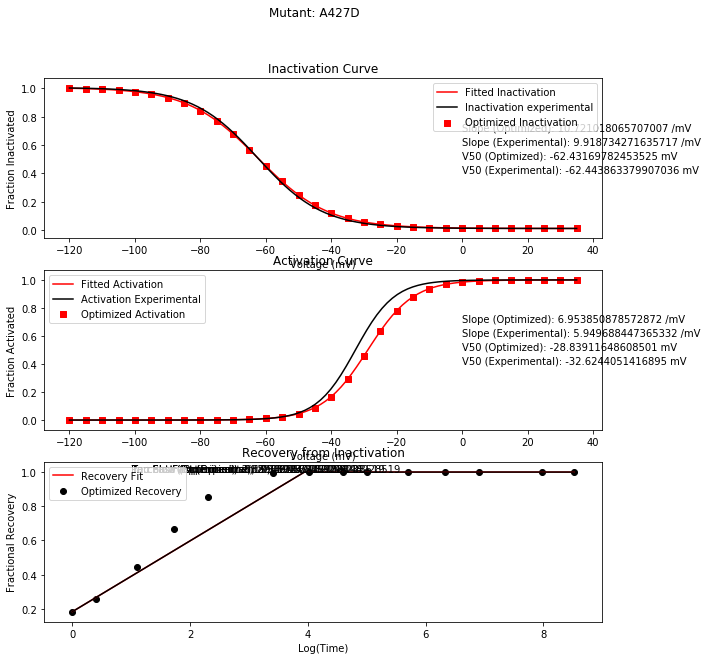

Generation: 13


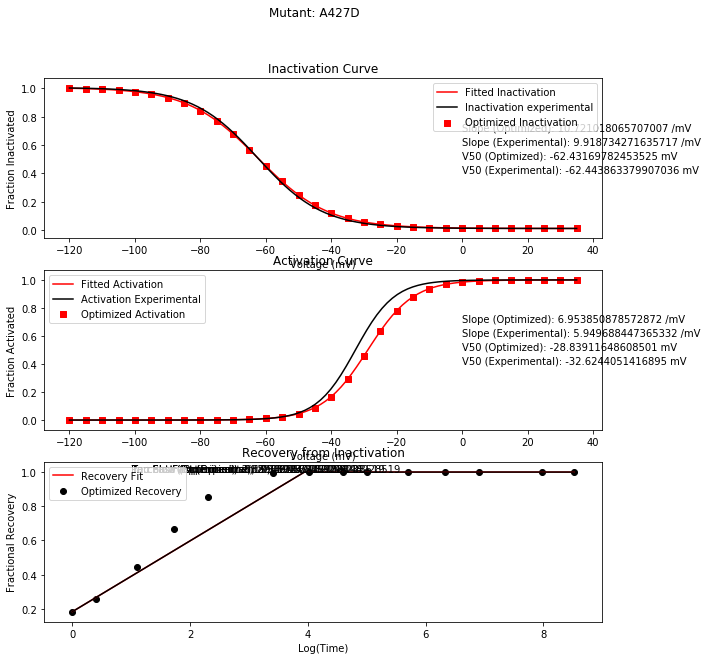

Generation: 14


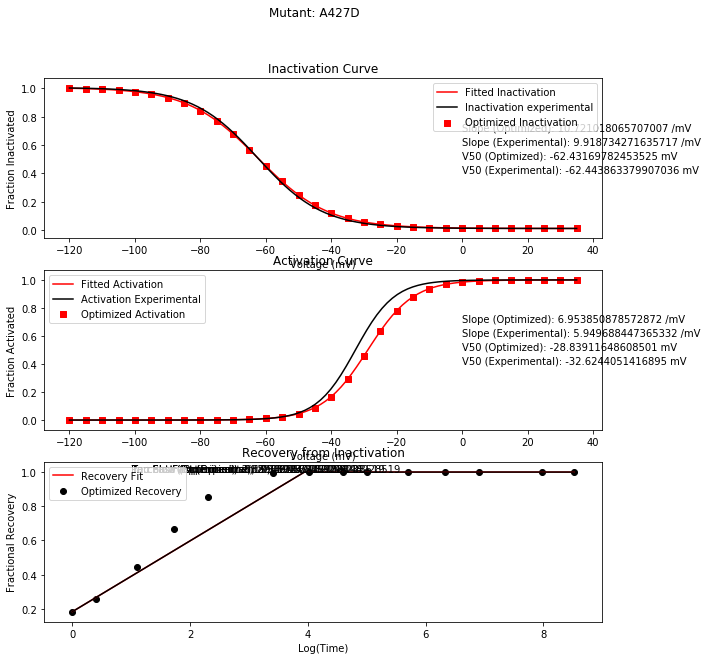

Generation: 15


IndexError: list index out of range

In [32]:
for i in range(1, 26):
    print('Generation: ' + str(i))
    evaluator.plot_data(best_indvs[i - 1], 'A427D')

In [ ]:
x = [[329.05329639102604, 0.1606308091165473, 0.03747348501333136, 0.06526885803219298, 190.9036832318502, 0.1796721956330009, 3.1289379891044624, 0.3334967529455608, 612.3972657411969, 0.3025076706861414, 3.025676019511704, 0.1259582839920209, 7.510910096536974, 0.09873672648427731, 0.45240175567275553, 2.432778951401892, 936.167509954995, 0.0192159423779658, 7.098868873725916, 2.7656822791019575], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485]]

In [ ]:
for i in range(len(x)):
    print(sum(evaluator.evaluate_with_lists(x[i])))

In [ ]:
x[3] == x[len(x) - 1]

In [ ]:
# Plotting some optimal values
evaluator.plot_data([180.6875979975121, 0.16823955067414018, 0.09980864886538265, 0.4824374737004963, 99.56973706764839, 0.078686789328423, 2.9338218229071766, 0.5261599250326092, 601.8364999904898, 0.09627324641022345, 1.4178074365320343, 0.250580513876519, 1.1625498949419764, 0.6285519005373086, 0.4569420383448888, 3.3231389753879226, 20.616036487873206, 0.07214671456172655, 6.257583287441859, 15.055110328650253], 'A427D')

In [ ]:
evaluator = vcl_ev.Vclamp_evaluator_HMM('./params_na12mut8st.csv', 'A427D', 'na12mut8st', objective_names=['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope'])

In [ ]:
evaluator.plot_data([55.66805380653187, 0.19600108106576467, 0.09987174976201142, 0.8715965845899388, 114.08959587764383, 0.12690767253535756, 1.348376713486997, 0.17672226305676939, 209.11358739071602, 0.033527986165445, 1.7979339786764499, 0.16078083780150224, 24.49727938441211, 2.4953874802512344, 0.1610697569590799, 1.4503819693806173, 324.71157454508636, 0.10111975929097147, 6.0412792502831945, 13.082083702446393], 'A427D')